# Question 1

In [66]:
#Check C# codes



# Question 2

In [67]:
#Check C# codes

# Question 3

In [9]:
#Step 1. Import the necessary libraries

import pandas as pd
import numpy as  np

In [10]:
#Step 2. Create 3 differents Series, each of length 100, as follows:

#The first a random number from 1 to 4
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))

#The second a random number from 1 to 3
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))

#The third a random number from 10,000 to 30,000
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

In [11]:
#Step 3. Create a DataFrame by joinning the Series by column

Housing = pd.concat([s1, s2, s3], axis=1)
Housing.head()

,0,1,2
0,4,1,16957
1,3,3,12263
2,4,3,12254
3,1,3,12916
4,2,1,20491


In [12]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
Housing.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,16957
1,3,3,12263
2,4,3,12254
3,1,3,12916
4,2,1,20491


In [13]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

bigcolumn = pd.DataFrame(pd.concat([s1, s2, s3], axis=0))
bigcolumn

,0
0,4
1,3
2,4
3,1
4,2
...,...
95,26618
96,11964
97,13850
98,15189


In [14]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

bigcolumn.iloc[95:105,]

#Answer: True. Index is only until 99.

,0
95,3
96,4
97,3
98,3
99,1
0,1
1,3
2,3
3,3
4,1


In [15]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

bigcolumn.reset_index(inplace = True) 
bigcolumn.iloc[95:105,]

,index,0
95,95,3
96,96,4
97,97,3
98,98,3
99,99,1
100,0,1
101,1,3
102,2,3
103,3,3
104,4,1


# Question 4

In [16]:
# Step 1. Import the necessary libraries

import numpy as np
import pandas as pd
import datetime

In [17]:
#Step 2. Import the dataset from this address https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data

data=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep="\s+",parse_dates=[[0,1,2]])

In [18]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [19]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix itand apply it.

def fix_century(x):
  year=x.year-100 if x.year > 1979 else x.year
  return datetime.date(year,x.month,x.day)
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(fix_century)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [20]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [21]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.


data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [22]:
#Step 7. Compute how many non-missing values there are in total.

data.shape[0]-data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [23]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

data.mean().mean()

10.227982360836924

In [24]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.
#A different set of numbers for each location.

loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [25]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.

day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [26]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
january_winds=data.query('month==1')
january_winds
january_winds.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [27]:
#Step 12. Downsample the record to a yearly frequency for each location.

data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


In [28]:
#Step 13. Downsample the record to a monthly frequency for each location.

data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


In [64]:
#Step 14. Downsample the record to a weekly frequency for each location

data.query('date == 1')
weekly_summary['speed'] = df.speed.resample('W').mean()

UndefinedVariableError: name 'date' is not defined

In [30]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

df_1961 = data[data.index < pd.to_datetime('1962-01-01')]
df_1961.resample('W').mean()
df_1961.resample('W').min()
df_1961.resample('W').max()
df_1961.resample('W').std()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-08,2.631321,3.949525,1.604761,1.810743,3.251660,2.059546,1.872222,3.098404,1.722255,1.704941,4.349139,1.773062,0.000000,0.0,2.160247
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355,0.000000,0.0,2.160247
1961-01-22,5.337402,3.837785,5.086229,6.245541,3.612875,3.453432,5.166300,3.164990,4.169112,4.783952,3.626584,4.237239,0.000000,0.0,2.160247
1961-01-29,4.619061,5.170224,4.665843,4.301325,4.858116,3.749415,4.508449,4.436222,4.902057,3.713368,5.210726,3.874721,0.000000,0.0,2.160247
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104,0.487950,0.0,13.483676
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705,0.000000,0.0,2.160247
1961-02-19,5.064609,3.575012,4.196621,4.311569,2.321716,3.024078,4.958631,2.283444,2.560591,2.531361,5.910938,4.685377,0.000000,0.0,2.160247
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283,0.000000,0.0,2.160247


# Question 5


In [31]:
#Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [32]:
#Step 2. Import the dataset from https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [33]:
#Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv(url, sep = '\t')

In [34]:
#Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [35]:
#Step 5. What is the number of observations in the dataset?

chipo.shape[0]

4622

In [36]:
#Step 6. What is the number of columns in the dataset?

chipo.shape[1]

5

In [37]:
#Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [38]:
#Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [39]:
#Step 9. Which was the most-ordered item?

c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)

#Chicken Bowl was the most-ordered item.

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [40]:
#Step 10. For the most-ordered item, how many items were ordered?

c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)

#The Chicken Bowl, most ordered item, had 761 ordered items. 

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [41]:
#Step 11. What was the most ordered item in the choice_description column?

c = chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False)
c.head(1)

#Diet Coke was the most ordered item in the choice_description column.  

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [42]:
#Step 12. How many items were orderd in total?

chipo.quantity.sum()

4972

In [43]:
#Step 13. 
#Turn the item price into a float
#Check the item price type
#Create a lambda function and change the type of item price
#Check the item price type

dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [44]:
#Step 14. How much was the revenue for the period in the dataset?

revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue

39237.02

In [45]:
#Step 15. How many orders were made in the period?

chipo.order_id.value_counts().count()

1834

In [46]:
#Step 16. What is the average revenue amount per order?

order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped['item_price'].mean()

18.81142857142869

In [47]:
#Step 17. How many different items are sold?

chipo.item_name.value_counts().count()

50

# Question 6

<Figure size 432x288 with 0 Axes>

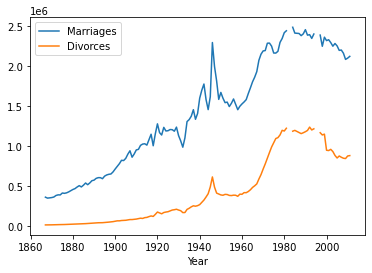

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\corte\Downloads\us-marriages-divorces-1867-2014.csv")

plt.figure()

df.plot('Year', y=['Marriages', 'Divorces'])
plt.show()

# Question 7

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\corte\Downloads\us-marriages-divorces-1867-2014.csv")

df_marriages_per_1000 = df_divorces_per_1000.year['1900', years]
df_marriages_per_1000.head()

NameError: name 'df_divorces_per_1000' is not defined

# Question 8

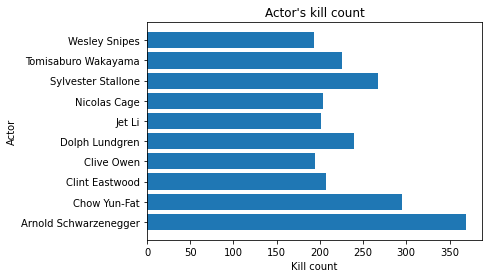

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv(r"C:\Users\corte\Downloads\actor_kill_counts.csv")
plt.barh(df['Actor'], df['Count'])
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.show()

# Question 9

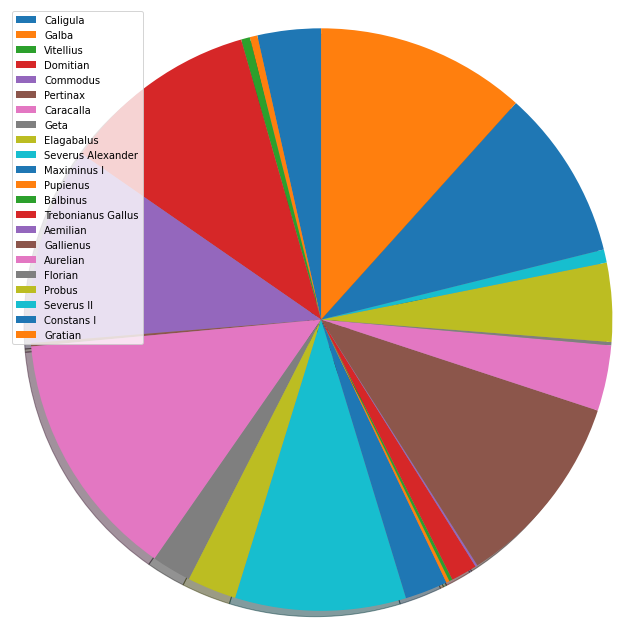

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\corte\Downloads\roman-emperor-reigns.csv")
df.head()

df1 = df[df['Cause_of_Death'] == "Assassinated" ]
df1.head()

fig= plt.figure(figsize=(9,9))

patches, texts = plt.pie(df1.Length_of_Reign, shadow=True, startangle=90)
plt.legend(df1.Emperor, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Question 10

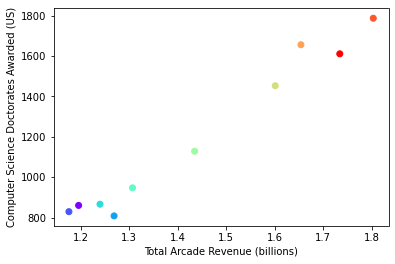

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv(r'C:\Users\corte\Downloads\arcade-revenue-vs-cs-doctorates.csv')
data

plt.scatter(x="Total Arcade Revenue (billions)",y="Computer Science Doctorates Awarded (US)",c=data.Year,cmap="rainbow",data=data)

plt.xlabel('Total Arcade Revenue (billions)')

plt.ylabel('Computer Science Doctorates Awarded (US)')

plt.show()